In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Insira o caminho do data set
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [5]:
dados = pd.read_csv('/content/Walmart+Data+Analysis+and+Forcasting.csv')

In [6]:
# Visualizando as primeiras linhas do DataFrame
print(dados.head())

   Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1  05-02-2010    1643690.90             0        42.31       2.572   
1      1  12-02-2010    1641957.44             1        38.51       2.548   
2      1  19-02-2010    1611968.17             0        39.93       2.514   
3      1  26-02-2010    1409727.59             0        46.63       2.561   
4      1  05-03-2010    1554806.68             0        46.50       2.625   

          CPI  Unemployment  
0  211.096358         8.106  
1  211.242170         8.106  
2  211.289143         8.106  
3  211.319643         8.106  
4  211.350143         8.106  


In [7]:
# Resumo estatístico dos dados
print(dados.describe())

             Store  Weekly_Sales  Holiday_Flag  Temperature   Fuel_Price  \
count  6435.000000  6.435000e+03   6435.000000  6435.000000  6435.000000   
mean     23.000000  1.046965e+06      0.069930    60.663782     3.358607   
std      12.988182  5.643666e+05      0.255049    18.444933     0.459020   
min       1.000000  2.099862e+05      0.000000    -2.060000     2.472000   
25%      12.000000  5.533501e+05      0.000000    47.460000     2.933000   
50%      23.000000  9.607460e+05      0.000000    62.670000     3.445000   
75%      34.000000  1.420159e+06      0.000000    74.940000     3.735000   
max      45.000000  3.818686e+06      1.000000   100.140000     4.468000   

               CPI  Unemployment  
count  6435.000000   6435.000000  
mean    171.578394      7.999151  
std      39.356712      1.875885  
min     126.064000      3.879000  
25%     131.735000      6.891000  
50%     182.616521      7.874000  
75%     212.743293      8.622000  
max     227.232807     14.313000  


In [8]:
dados.columns = ['Lojas', 'Data', 'Vendas_Semanais', 'Feriado', 'Temperatura', 'Preço_Combustível', 'IPC', 'Tx_Desemprego']
# Informações sobre o DataFrame
print(dados.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Lojas              6435 non-null   int64  
 1   Data               6435 non-null   object 
 2   Vendas_Semanais    6435 non-null   float64
 3   Feriado            6435 non-null   int64  
 4   Temperatura        6435 non-null   float64
 5   Preço_Combustível  6435 non-null   float64
 6   IPC                6435 non-null   float64
 7   Tx_Desemprego      6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB
None


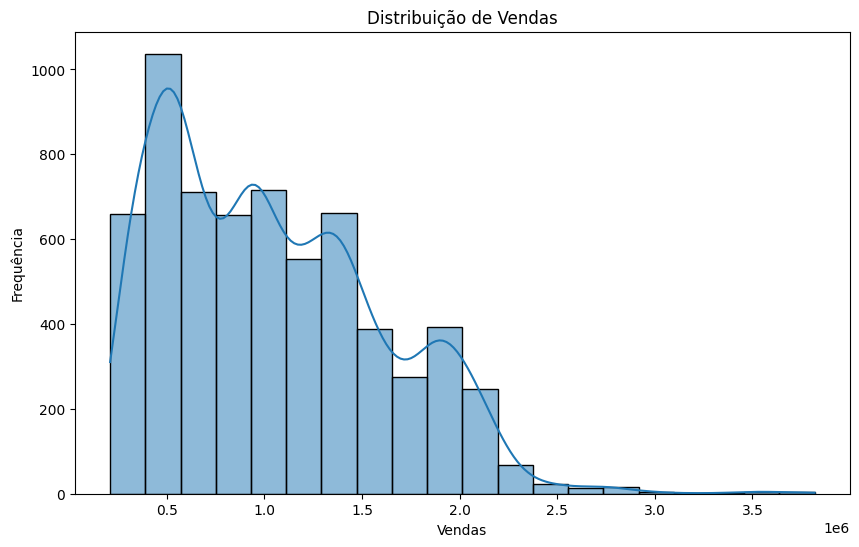

In [9]:
# Histograma de uma variável específica (por exemplo, Vendas_Semanais)
plt.figure(figsize=(10, 6))
sns.histplot(dados['Vendas_Semanais'], bins=20, kde=True)
plt.title('Distribuição de Vendas')
plt.xlabel('Vendas')
plt.ylabel('Frequência')
plt.show()

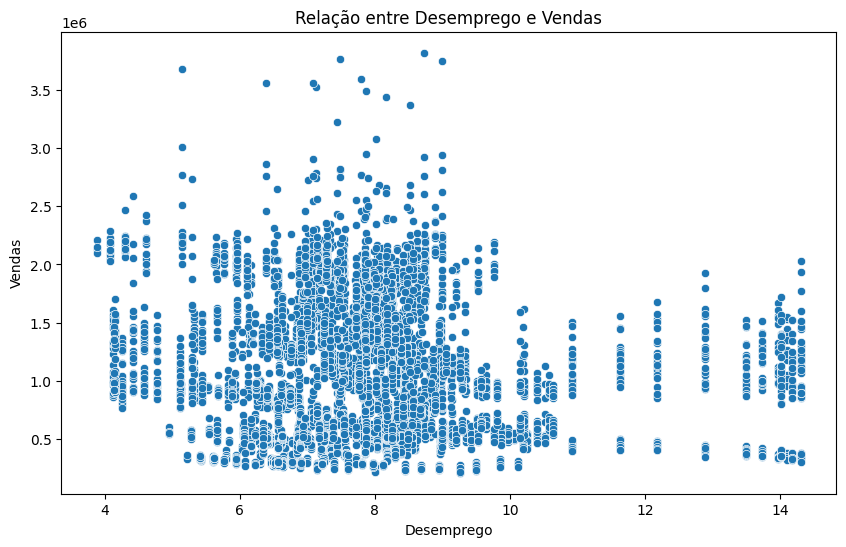

In [10]:
# Gráfico de dispersão entre duas variáveis (por exemplo, Vendas_Semanais e Desemprego)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Tx_Desemprego', y='Vendas_Semanais', data=dados)
plt.title('Relação entre Desemprego e Vendas')
plt.xlabel('Desemprego')
plt.ylabel('Vendas')
plt.show()

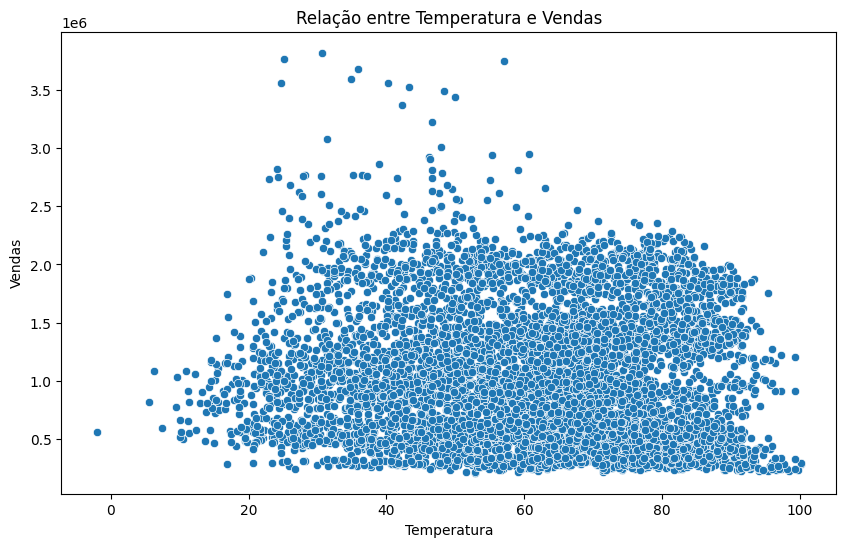

In [11]:
# Gráfico de dispersão entre duas variáveis (por exemplo, Vendas_Semanais e Temperatura)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Temperatura', y='Vendas_Semanais', data=dados)
plt.title('Relação entre Temperatura e Vendas')
plt.xlabel('Temperatura')
plt.ylabel('Vendas')
plt.show()

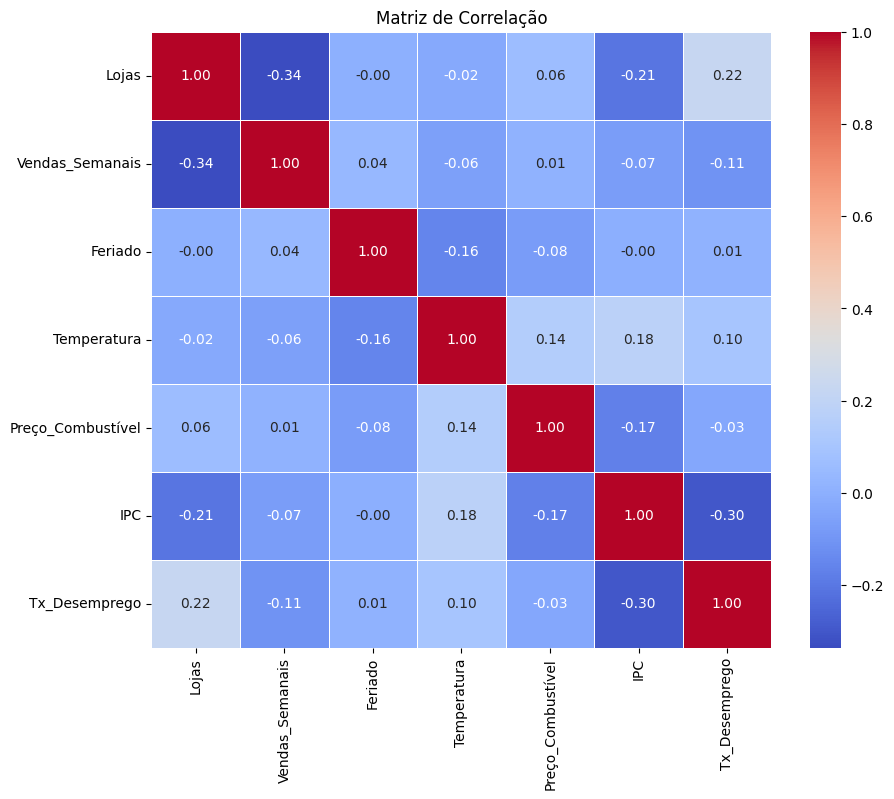

In [14]:
# Matriz de correlação entre variáveis numéricas
correlacao = dados.corr(numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(correlacao, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Matriz de Correlação')
plt.show()

In [20]:
# Ajustando os campos de data do Data Frame
dados['Dia'] = pd.DatetimeIndex(dados.Data).day
dados['Mês'] = pd.DatetimeIndex(dados.Data).month
dados['Ano'] = pd.DatetimeIndex(dados.Data).year
dados.drop('Data', axis=1, inplace=True)

In [21]:
# Agrupando por loja e calculando a soma das vendas semanais
venda_semanal_por_loja = dados.groupby('Lojas')['Vendas_Semanais'].sum().reset_index()

In [22]:
#Visualizando as vendas semanais
venda_semanal_por_loja

,Lojas,Vendas_Semanais
0,1,2.224028e+08
1,2,2.753824e+08
2,3,5.758674e+07
3,4,2.995440e+08
4,5,4.547569e+07
5,6,2.237561e+08
6,7,8.159828e+07
7,8,1.299512e+08
8,9,7.778922e+07
9,10,2.716177e+08


In [23]:
# Agrupando por loja e calculando a soma das vendas anuais
venda_anual_por_loja = dados.groupby('Ano')['Vendas_Semanais'].sum().reset_index()

In [24]:
#Visualizando as vendas anuais
venda_anual_por_loja

,Ano,Vendas_Semanais
0,2010,2.288886e+09
1,2011,2.448200e+09
2,2012,2.000133e+09


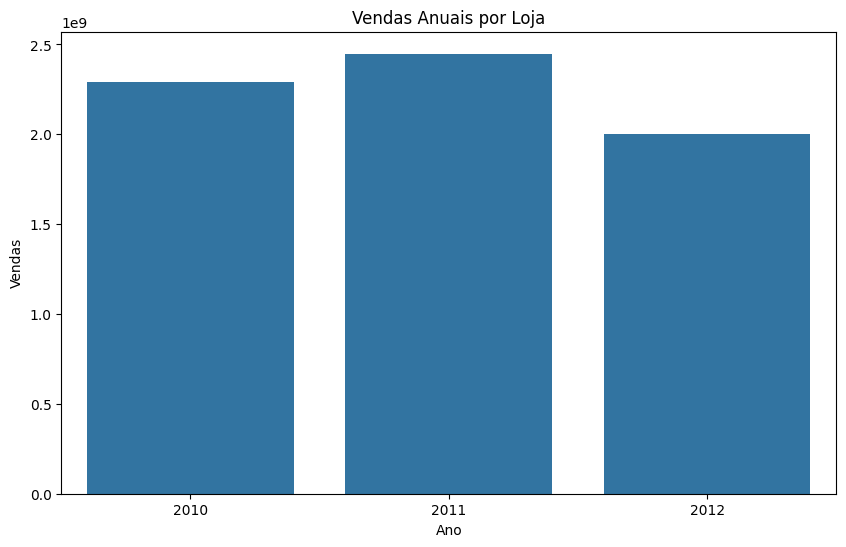

In [25]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.barplot(x='Ano', y='Vendas_Semanais', data=venda_anual_por_loja)
plt.title('Vendas Anuais por Loja')
plt.xlabel('Ano')
plt.ylabel('Vendas')
plt.show()

In [26]:
# Qual foi o menor faturamento, o maior faturamento e a média entre as lojas?
Menor_faturamento = venda_semanal_por_loja['Vendas_Semanais'].min()
Maior_faturamento = venda_semanal_por_loja['Vendas_Semanais'].max()
media = venda_semanal_por_loja['Vendas_Semanais'].mean()
print(Menor_faturamento)
print(Maior_faturamento)
print(media)

37160221.96
301397792.46
149715977.49133334


In [27]:
#Quais lojas tiveram o maior e o menor faturamento?
Loja_Menor_faturamento = venda_semanal_por_loja['Vendas_Semanais'].idxmin()
Loja_Maior_faturamento = venda_semanal_por_loja['Vendas_Semanais'].idxmax()
print(Loja_Menor_faturamento)
print(Loja_Maior_faturamento)

32
19


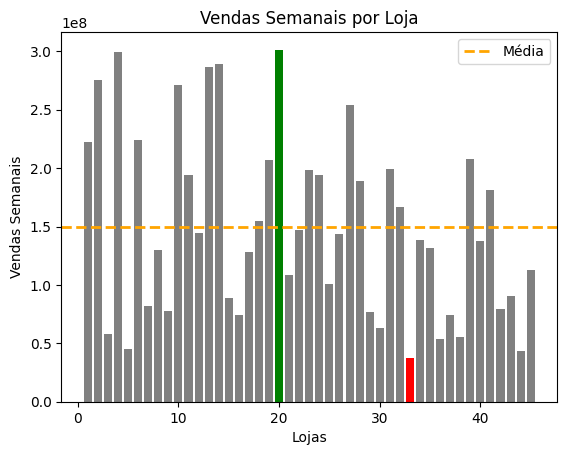

In [28]:
# Criando o gráfico de barras
cores = ['grey'] * len(venda_semanal_por_loja)
cores[Loja_Menor_faturamento] = 'red'  # Destacando o menor valor em vermelho
cores[Loja_Maior_faturamento] = 'green'  # Destacando o maior valor em verde
plt.bar(venda_semanal_por_loja['Lojas'], venda_semanal_por_loja['Vendas_Semanais'], color=cores)
# Adicionando uma linha para representar a média
plt.axhline(media, color='orange', linestyle='dashed', linewidth=2, label='Média')
# Adicionando rótulos e título
plt.xlabel('Lojas')
plt.ylabel('Vendas Semanais')
plt.title('Vendas Semanais por Loja')
# Exibindo a legenda
plt.legend()
# Exibindo o gráfico
plt.show()

([<matplotlib.axis.XTick at 0x7b325292fdf0>,
 [Text(0, 0, 'Dia Útil'), Text(1, 0, 'Feriado')])

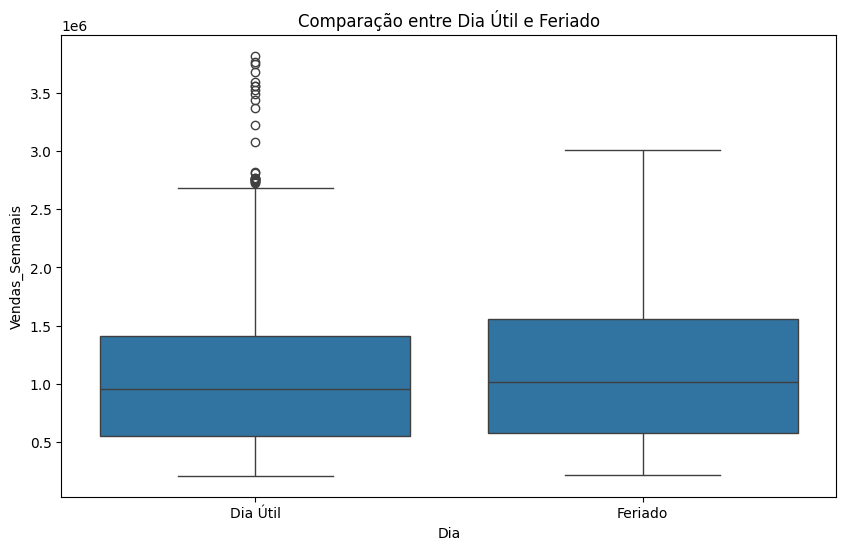

In [29]:
#Qual o impacto dos feriados nas vendas semanais?
plt.figure(figsize=(10, 6))
sns.boxplot(data=dados, x = "Feriado" , y='Vendas_Semanais')
plt.title('Comparação entre Dia Útil e Feriado')
plt.xlabel('Dia')
plt.xticks([0, 1], ['Dia Útil', 'Feriado'])